# PHÂN TÍCH VỀ ĐAU TIM
thực hiện bởi DAYLANHOM_PI (c)2024

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [76]:
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install seaborn
# !pip3 install xgboost
# !pip3 install plotly

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings("ignore")

In [78]:
data = pd.read_csv("data\heart_attack_prediction_dataset.csv")
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


***Giải thích 1 số cột***

- **Patient ID:** Mã bệnh nhân.
- **Age (tuổi):** Tuổi.
- **Sex:** Giới tính (Male: Nam, Female: Nữ).
- **Cholesterol (mg/dL):** Mức cholesterol trong máu.
- **Blood Pressure (mmHg):** Huyết áp tâm thu / Huyết áp tâm trương (áp lực máu lên thành động mạch khi tim co bóp / giãn).
- **Heart Rate (nhịp/phút):** Nhịp tim.
- **Diabetes:** Bị tiểu đường hay không (1 = Có, 0 = Không).
- **Family History:** Có tiền sử gia đình mắc bệnh tim hay không (1 = Có, 0 = Không).
- **Smoking:** Có hút thuốc hay không (1 = Có, 0 = Không).
- **Obesity:** Có bị béo phì hay không (1 = Có, 0 = Không).
- **Alcohol Consumption:** Có uống rượu bia hay không (1 = Có, 0 = Không).
- **Exercise Hours Per Week (giờ):** Số giờ tập thể dục mỗi tuần.
- **Diet:** Chế độ ăn uống của bệnh nhân (Healthy, Unhealthy, Average).
- **Previous Heart Problems:** Có tiền sử bệnh tim hay không (1 = Có, 0 = Không).
- **Medication Use:** Có sử dụng thuốc hay không (1 = Có, 0 = Không).
- **Stress Level:** Mức độ căng thẳng (0-10).
- **Sedentary Hours Per Day (giờ):** Số giờ ngồi mỗi ngày.
- **Income:** Thu nhập.
- **BMI:** Chỉ số khối cơ thể.
- **Triglycerides:** Mức triglycerides trong máu.
- **Physical Activity Days Per Week (ngày):** Số ngày hoạt động thể chất mỗi tuần.
- **Sleep Hours Per Day (giờ)**:* Số giờ ngủ mỗi ngày của bệnh nhân.
- **Country:** Quốc gia.
- **Continent:** Châu lục.
- **Hemisphere:** Bán cầu.
- **Heart Attack Risk:** Nguy cơ đau tim (1 = Có nguy cơ, 0 = Không có nguy cơ).

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# I/ Xử lí dữ liệu

In [79]:
data.shape

(8763, 26)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [81]:
data.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [82]:
data.nunique()

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2


Xử lí các dữ liệu trùng lặp

In [83]:
data[data.duplicated()]

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk


In [84]:
data.drop_duplicates(keep='first',inplace=True)

Xử lí ngoại lai

- Ngoại lai ở các cột dạng int

In [85]:
# Tách cột huyết áp thành 2 chỉ số: huyết áp tâm trương và huyết áp tâm thu
data['BP_Systolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[0]).astype(int)
data['BP_Diastolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[1]).astype(int)
data.drop('Blood Pressure', axis=1, inplace=True)

# Chuyển lại cột output ra sau cùng
col = data.pop('Heart Attack Risk')
data['Heart Attack Risk'] = col

In [86]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

Age                                   Axes(0.125,0.747241;0.133621x0.132759)
Cholesterol                        Axes(0.285345,0.747241;0.133621x0.132759)
Heart Rate                          Axes(0.44569,0.747241;0.133621x0.132759)
Exercise Hours Per Week            Axes(0.606034,0.747241;0.133621x0.132759)
Sedentary Hours Per Day            Axes(0.766379,0.747241;0.133621x0.132759)
Income                                Axes(0.125,0.587931;0.133621x0.132759)
BMI                                Axes(0.285345,0.587931;0.133621x0.132759)
Triglycerides                       Axes(0.44569,0.587931;0.133621x0.132759)
Physical Activity Days Per Week    Axes(0.606034,0.587931;0.133621x0.132759)
Sleep Hours Per Day                Axes(0.766379,0.587931;0.133621x0.132759)
BP_Systolic                           Axes(0.125,0.428621;0.133621x0.132759)
BP_Diastolic                       Axes(0.285345,0.428621;0.133621x0.132759)
dtype: object

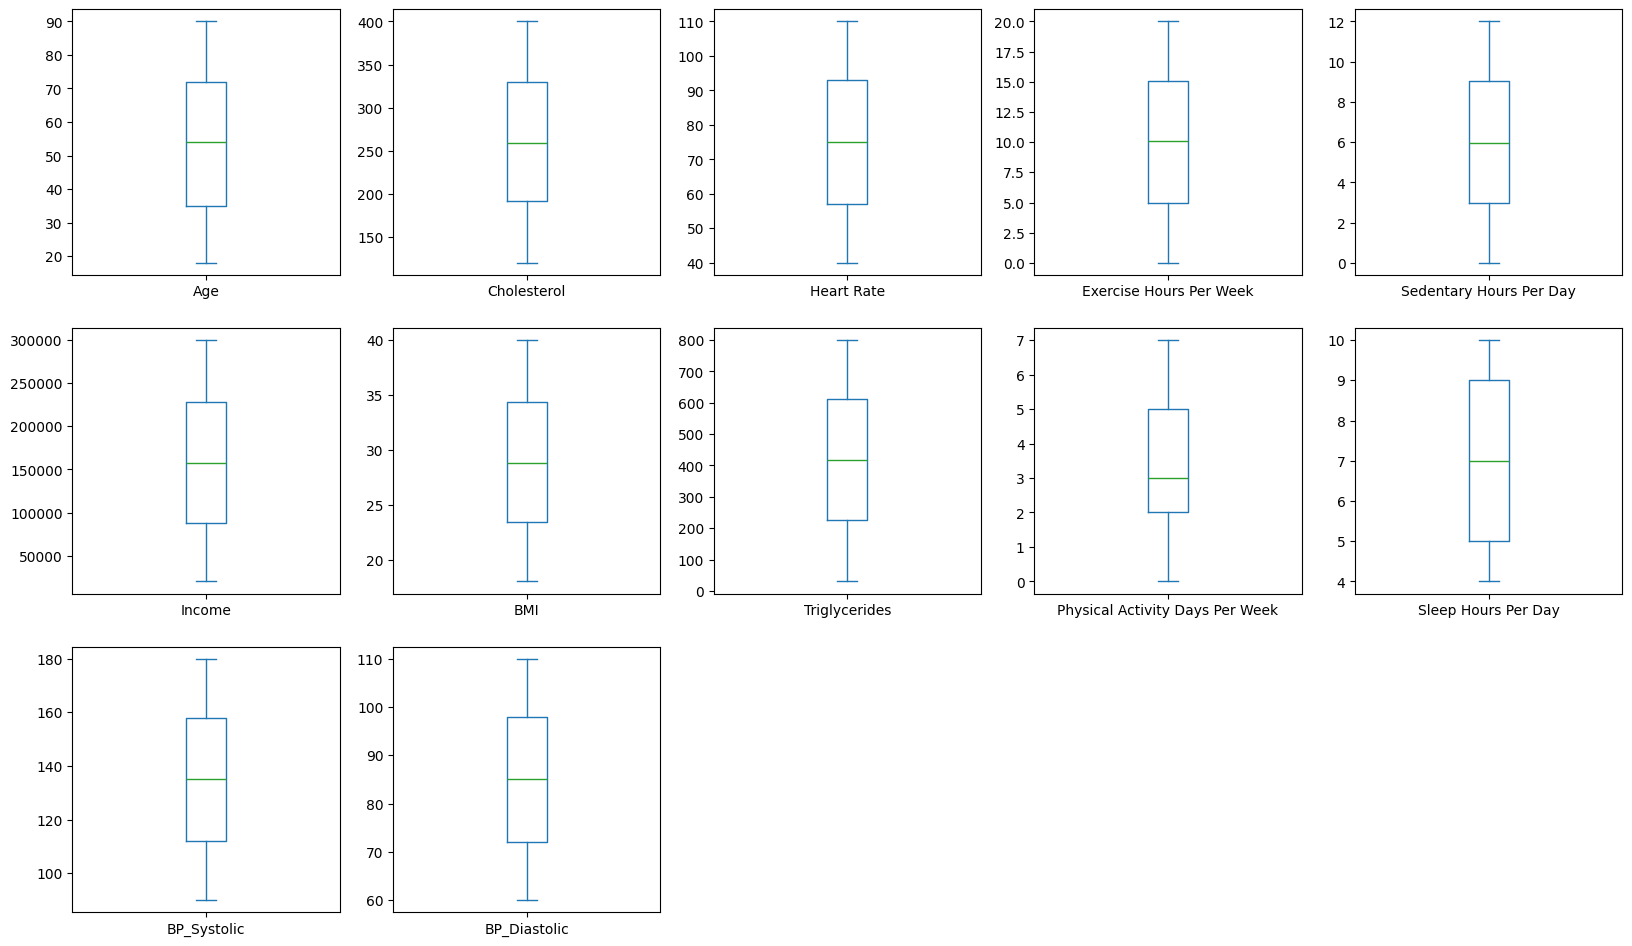

In [87]:
lstRemoveNL = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
               'Physical Activity Days Per Week', 'Sleep Hours Per Day','BP_Systolic', 'BP_Diastolic']

data[lstRemoveNL].plot(kind='box', subplots=True, layout=(5,5), figsize=(20,20))

- Ngoại lai ở các cột dạng object:
1. Kiểm tra dựa trên độ dài:

Xác định độ dài tối thiểu và tối đa cho phép:

2. Kiểm tra dựa trên nội dung:

Kiểm tra các ký tự không hợp lệ: Ví dụ, tên người không nên chứa ký tự đặc biệt hay số.
So sánh với danh sách từ điển: Kiểm tra xem các từ trong string có tồn tại trong từ điển hay không. Những từ không có trong từ điển có thể là lỗi chính tả hoặc ngoại lai.

3. Kiểm tra dựa trên tần suất xuất hiện:

Xác định ngưỡng tần suất: Những string xuất hiện với tần suất rất thấp có thể là ngoại lai.

- Python: Sử dụng các thư viện như re (biểu thức chính quy), NLTK (xử lý ngôn ngữ tự nhiên), pandas (phân tích dữ liệu).

In [88]:
myCountries = [] 
with open("data\countries.txt", 'r') as file:
    for line in file:
      elements = line.strip()
      myCountries.append(elements)

lstKollekzone = {
 'Sex' : ['Male', 'Female'],
 'Diet' : ['Healthy', 'Average', 'Unhealthy'],
 'Continent' : ['South America', 'North America',
                 'Asia', 'Europe', 'Africa', 'Australia'],
 'Country' : myCountries,
 'Hemisphere' : ['Northern Hemisphere', 'Southern Hemisphere']
}

for key in lstKollekzone:
   index = 0
   listDrop = []
   for x in data[key]:
      index += 1
      if x not in lstKollekzone[key]:
         listDrop.append(index)
         print(key, index)
   for i in listDrop:
      data.drop(data.iloc[index])

Kiểm tra lại data

In [89]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'BP_Systolic', 'BP_Diastolic', 'Heart Attack Risk'],
      dtype='object')

In [90]:
data.shape

(8763, 27)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [92]:
data.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
BP_Systolic                        0
BP_Diastolic                       0
Heart Attack Risk                  0
d

In [93]:
data.nunique()

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2
BP_Systolic                          91


In [94]:
data[data.duplicated()]

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,BP_Systolic,BP_Diastolic,Heart Attack Risk


In [95]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


Xuất file

In [96]:
data.to_csv('data\exported_file.csv', index=False)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# II/ Phân tích dữ liệu

In [97]:
ctg_data = data[['Sex','Diabetes','Family History','Smoking','Obesity','Diet','Continent','Country','Hemisphere']]

In [98]:
heart_attacks = data[data['Heart Attack Risk'] == 1]
heart_attacks.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,BP_Systolic,BP_Diastolic,Heart Attack Risk
5,ZOO7941,54,Female,297,48,1,1,1,0,1,...,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,172,86,1
6,WYV0966,90,Male,358,84,0,0,1,0,1,...,28.885811,284,4,10,Canada,North America,Northern Hemisphere,102,73,1
7,XXM0972,84,Male,220,107,0,0,1,1,1,...,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,131,68,1
12,FPS0415,77,Male,228,68,1,1,1,1,1,...,35.102236,590,7,6,Vietnam,Asia,Northern Hemisphere,101,72,1
13,YYU9565,60,Male,259,85,1,1,1,0,1,...,25.564897,506,1,4,China,Asia,Northern Hemisphere,169,72,1


Tuổi

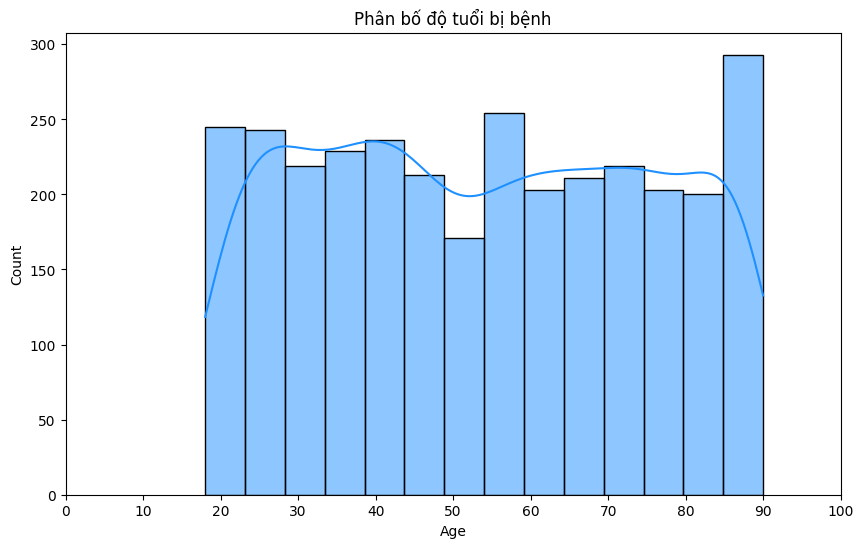

In [99]:
# Plot with histplot for both groups
plt.figure(figsize=(10, 6))
sns.histplot(heart_attacks["Age"], kde=True, color='dodgerblue')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 101, 10))
plt.title('Phân bố độ tuổi bị bệnh')
plt.show()

Giới tính

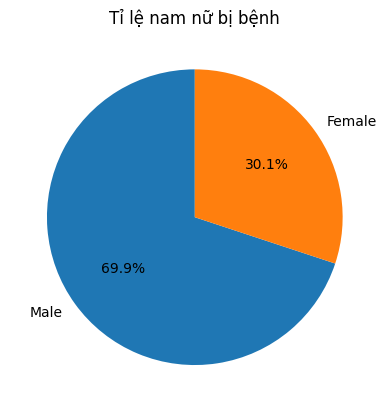

In [100]:
sizes= heart_attacks['Sex'].value_counts()
plt.pie(sizes, labels=sizes.index,autopct='%1.1f%%', startangle=90)
plt.title('Tỉ lệ nam nữ bị bệnh')
plt.show()

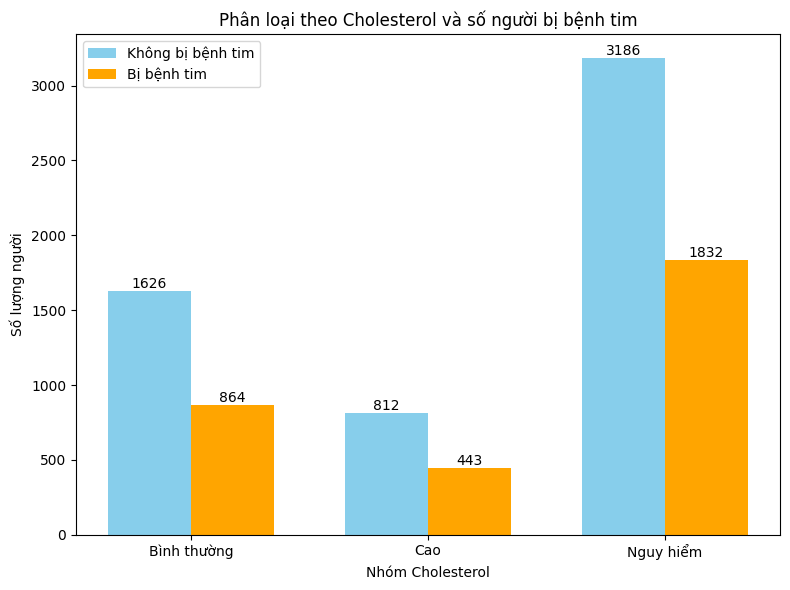

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Phân loại Cholesterol thành các nhóm
bins = [0, 200, 240, float('inf')]
labels = ['Bình thường', 'Cao', 'Nguy hiểm']
Chol_Category = pd.cut(data['Cholesterol'], bins=bins, labels=labels)
data['Chol_Category'] = Chol_Category  # Thêm cột phân loại vào dữ liệu

# Đếm tổng số người và số người bị bệnh tim trong mỗi nhóm
chol_num = data['Chol_Category'].value_counts()  # Tổng số người
heart_attack_counts = data.groupby('Chol_Category')['Heart Attack Risk'].sum()  # Người bị bệnh tim

# Tính số người không bị bệnh tim
no_heart_attack = chol_num - heart_attack_counts

# Chuyển đổi dữ liệu để vẽ
categories = labels
total_counts = [chol_num[label] for label in labels]
no_heart_attack = [no_heart_attack[label] for label in labels]
heart_attack = [heart_attack_counts[label] for label in labels]

# Vẽ biểu đồ cột nhóm
x = np.arange(len(categories))  # Vị trí các nhóm
width = 0.35  # Độ rộng của mỗi cột

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, no_heart_attack, width, label='Không bị bệnh tim', color='skyblue')
bar2 = ax.bar(x + width/2, heart_attack, width, label='Bị bệnh tim', color='orange')

# Thêm nhãn trên mỗi cột
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom')

# Tuỳ chỉnh biểu đồ
ax.set_xlabel('Nhóm Cholesterol')
ax.set_ylabel('Số lượng người')
ax.set_title('Phân loại theo Cholesterol và số người bị bệnh tim')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()


Cholesterol

Text(0.5, 1.0, 'Tỉ lệ bị đau tim của các nhóm')

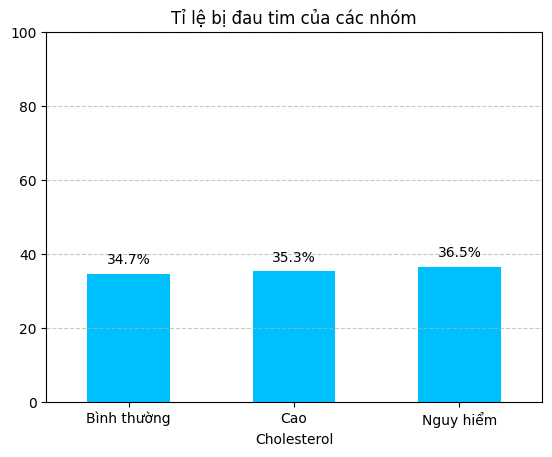

In [102]:
chol_cate = pd.cut(data['Cholesterol'], bins=bins, labels=labels)
percentages = data.groupby(chol_cate)['Heart Attack Risk'].value_counts(normalize=True).unstack()*100
percentages.columns = ['không bệnh', 'bị bệnh']

chart = percentages['bị bệnh'].plot(kind='bar', stacked=True, color='deepskyblue', ax=plt.gca())

plt.ylim(0,100)    
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in chart.patches:
    chart.annotate(format(p.get_height(), '.1f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points',
                   fontsize=10)
plt.title('Tỉ lệ bị đau tim của các nhóm')

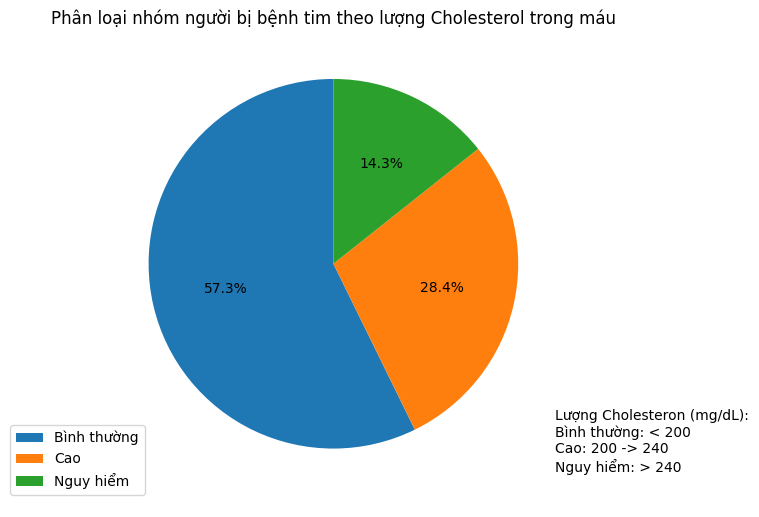

In [103]:
# Tính tổng số người trong mỗi nhóm
chol_num = Chol_Category.value_counts()

# Tạo biểu đồ pie
plt.figure(figsize=(6, 6))
plt.pie(chol_num, autopct='%1.1f%%', startangle=90)


# Thêm chú thích chính về lượng Cholesterol
plt.text(1.2, -1.3, 
         s='Lượng Cholesteron (mg/dL):\n'
           'Bình thường: < 200\n'
           'Cao: 200 -> 240\n'
           'Nguy hiểm: > 240\n\n', 
         fontsize=10)

# Thêm legend và tiêu đề
plt.legend(labels, loc=(-0.2, 0))
plt.title('Phân loại nhóm người bị bệnh tim theo lượng Cholesterol trong máu')
plt.show()


Heart Rate

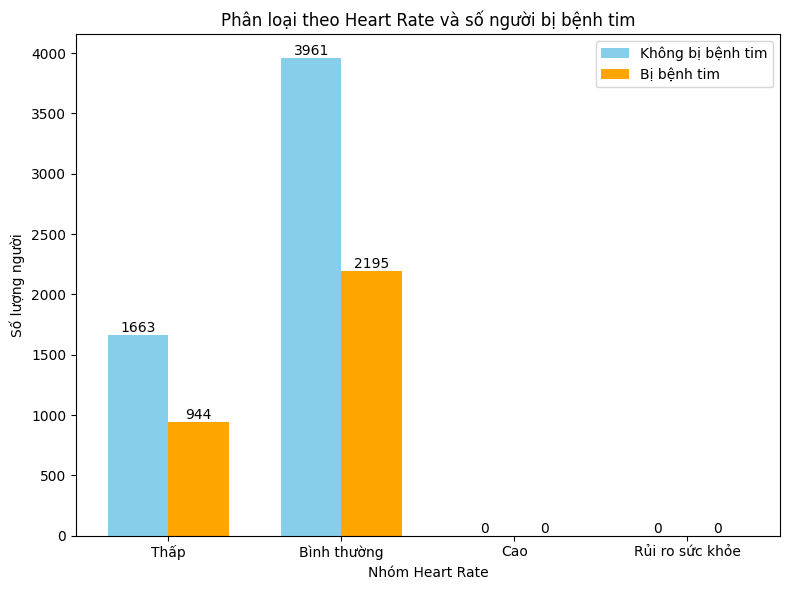

In [149]:
import matplotlib.pyplot as plt
import numpy as np

# Phân loại Heart Rate thành các nhóm
bins = [0, 60, 125, 140, float('inf')]  # Các mức giới hạn cho các nhóm
labels = ['Thấp', 'Bình thường', 'Cao', 'Rủi ro sức khỏe']  # Các nhãn tương ứng với các nhóm
colors = ['lime', 'aqua', 'orange', 'red']  # Màu sắc cho các nhóm

# Sử dụng pd.cut để phân chia cột Heart Rate thành các nhóm
hr_category = pd.cut(data['Heart Rate'], bins=bins, labels=labels, ordered=False)
data['HR_Category'] = hr_category  # Thêm cột phân loại vào dữ liệu

# Đếm số người bị và không bị bệnh tim trong mỗi nhóm
hr_num = data['HR_Category'].value_counts()  # Tổng số người
heart_attack_counts = data.groupby('HR_Category')['Heart Attack Risk'].sum()  # Số người bị bệnh tim
no_heart_attack = hr_num - heart_attack_counts  # Số người không bị bệnh tim

# Chuyển dữ liệu để vẽ
categories = labels
no_heart_attack = [no_heart_attack[label] for label in labels]
heart_attack = [heart_attack_counts[label] for label in labels]

# Vẽ biểu đồ cột nhóm
x = np.arange(len(categories))  # Vị trí các nhóm
width = 0.35  # Độ rộng của mỗi cột

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, no_heart_attack, width, label='Không bị bệnh tim', color='skyblue')
bar2 = ax.bar(x + width/2, heart_attack, width, label='Bị bệnh tim', color='orange')

# Thêm nhãn trên mỗi cột
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom')

# Tuỳ chỉnh biểu đồ
ax.set_xlabel('Nhóm Heart Rate')
ax.set_ylabel('Số lượng người')
ax.set_title('Phân loại theo Heart Rate và số người bị bệnh tim')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()


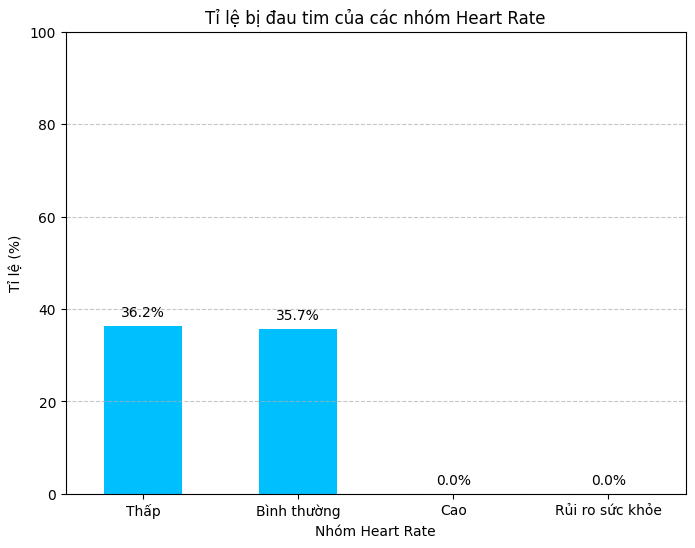

In [150]:
# Tính tỉ lệ % người bị bệnh tim theo từng nhóm Heart Rate
percentages = data.groupby(hr_category)['Heart Attack Risk'].value_counts(normalize=True).unstack() * 100
percentages.columns = ['Không bệnh', 'Bị bệnh']  # Đặt tên cho các cột

# Vẽ biểu đồ tỉ lệ % bị bệnh tim
fig, ax = plt.subplots(figsize=(8, 6))
chart = percentages['Bị bệnh'].plot(kind='bar', color='deepskyblue', ax=ax)

# Tùy chỉnh biểu đồ
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm nhãn giá trị trên từng cột
for p in chart.patches:
    chart.annotate(f"{p.get_height():.1f}%",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points',
                   fontsize=10)

plt.title('Tỉ lệ bị đau tim của các nhóm Heart Rate')
plt.xlabel('Nhóm Heart Rate')
plt.ylabel('Tỉ lệ (%)')
plt.show()


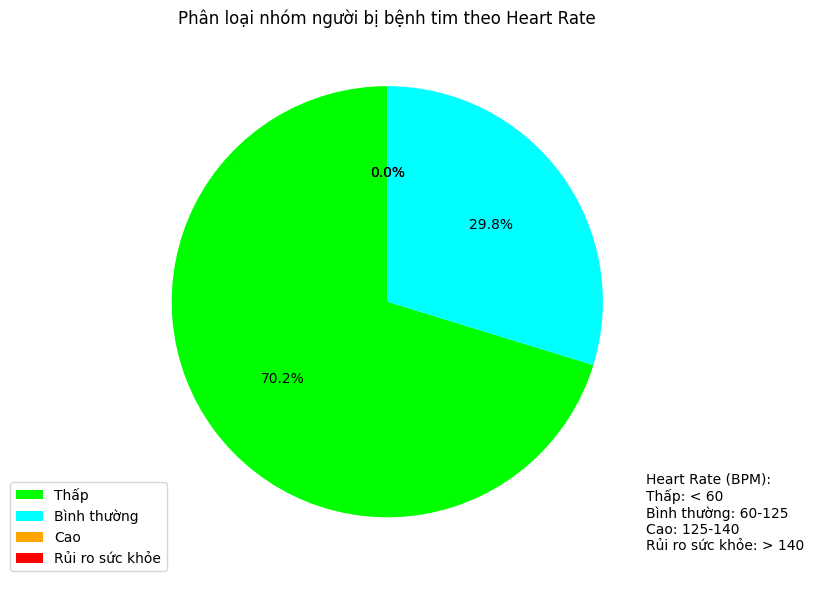

In [151]:
# Đếm tổng số người trong từng nhóm Heart Rate
hr_counts = data['HR_Category'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(7, 7))
plt.pie(hr_counts, autopct='%1.1f%%', startangle=90, colors=colors)

# Thêm chú thích về nhóm Heart Rate
plt.text(1.2, -1.3,
         s='Heart Rate (BPM):\n'
           'Thấp: < 60\n'
           'Bình thường: 60-125\n'
           'Cao: 125-140\n'
           'Rủi ro sức khỏe: > 140\n\n',
         fontsize=10)

# Thêm chú thích và tiêu đề
plt.legend(labels, loc=(-0.2, 0))
plt.title('Phân loại nhóm người bị bệnh tim theo Heart Rate')
plt.show()


Blood Pressure

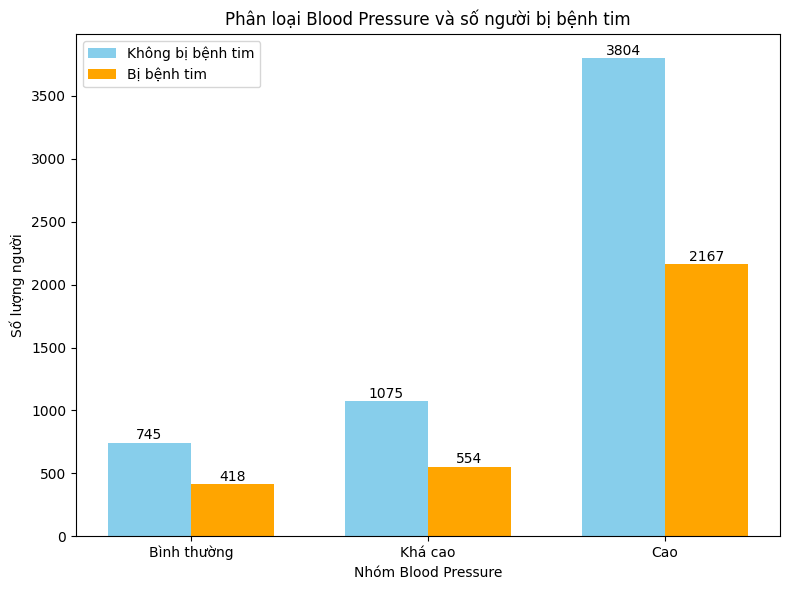

In [159]:
# Phân loại Blood Pressure dựa trên các điều kiện
def categorize_blood_pressure(data):    
    # Áp dụng các điều kiện phân loại
    if data['BP_Systolic'] < 120 and data['BP_Diastolic'] < 80:
        return 'Bình thường'
    elif data['BP_Systolic'] >= 140 or data['BP_Diastolic'] >= 90:
        return 'Cao'
    else:
        return 'Khá cao'  # Mức huyết áp cao tiền đề

# Áp dụng hàm phân loại Blood Pressure vào cột dữ liệu
data['BP_Category'] = data.apply(categorize_blood_pressure, axis=1)

# Đếm tổng số người trong từng nhóm Blood Pressure
bp_num = data['BP_Category'].value_counts()  # Tổng số người
# Đếm số người bị bệnh tim trong từng nhóm Blood Pressure
heart_attack_counts = data.groupby('BP_Category')['Heart Attack Risk'].sum()  # Số người bị bệnh tim

# Tính số người không bị bệnh tim trong từng nhóm Blood Pressure
no_heart_attack = bp_num - heart_attack_counts  # Số người không bị bệnh tim

# Chuyển đổi dữ liệu để vẽ
categories = ['Bình thường', 'Khá cao', 'Cao']  # Các nhãn cho các nhóm
no_heart_attack = [no_heart_attack[label] for label in categories]
heart_attack = [heart_attack_counts[label] for label in categories]

# Vẽ biểu đồ cột nhóm
x = np.arange(len(categories))  # Vị trí các nhóm
width = 0.35  # Độ rộng của mỗi cột

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, no_heart_attack, width, label='Không bị bệnh tim', color='skyblue')
bar2 = ax.bar(x + width/2, heart_attack, width, label='Bị bệnh tim', color='orange')

# Thêm nhãn trên các cột
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom')

# Tuỳ chỉnh biểu đồ
ax.set_xlabel('Nhóm Blood Pressure')  # Nhãn trục x
ax.set_ylabel('Số lượng người')  # Nhãn trục y
ax.set_title('Phân loại Blood Pressure và số người bị bệnh tim')  # Tiêu đề biểu đồ
ax.set_xticks(x)  # Vị trí các nhãn trên trục x
ax.set_xticklabels(categories)  # Nhãn của các nhóm trên trục x
ax.legend()  # Hiển thị chú thích

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


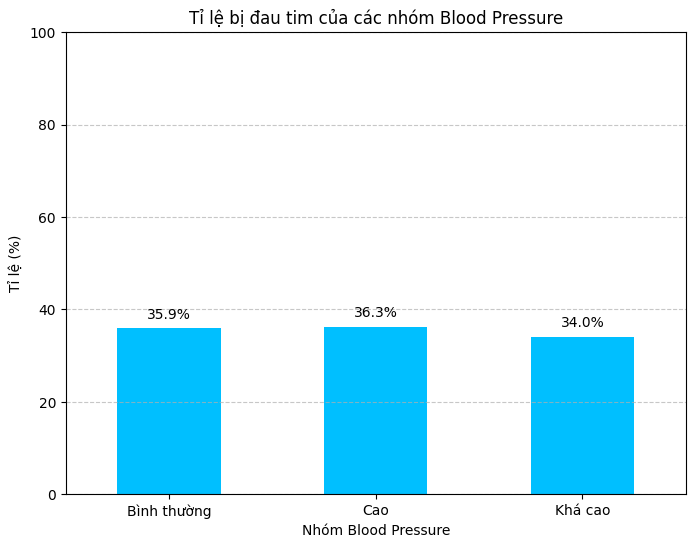

In [160]:
# Tính tỉ lệ phần trăm
percentages = data.groupby('BP_Category')['Heart Attack Risk'].value_counts(normalize=True).unstack() * 100
percentages.columns = ['Không bệnh', 'Bị bệnh']

# Vẽ biểu đồ tỉ lệ % bị bệnh tim
fig, ax = plt.subplots(figsize=(8, 6))
chart = percentages['Bị bệnh'].plot(kind='bar', color='deepskyblue', ax=ax)

# Tùy chỉnh biểu đồ
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm nhãn giá trị trên từng cột
for p in chart.patches:
    chart.annotate(f"{p.get_height():.1f}%",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points',
                   fontsize=10)

plt.title('Tỉ lệ bị đau tim của các nhóm Blood Pressure')
plt.xlabel('Nhóm Blood Pressure')
plt.ylabel('Tỉ lệ (%)')
plt.show()


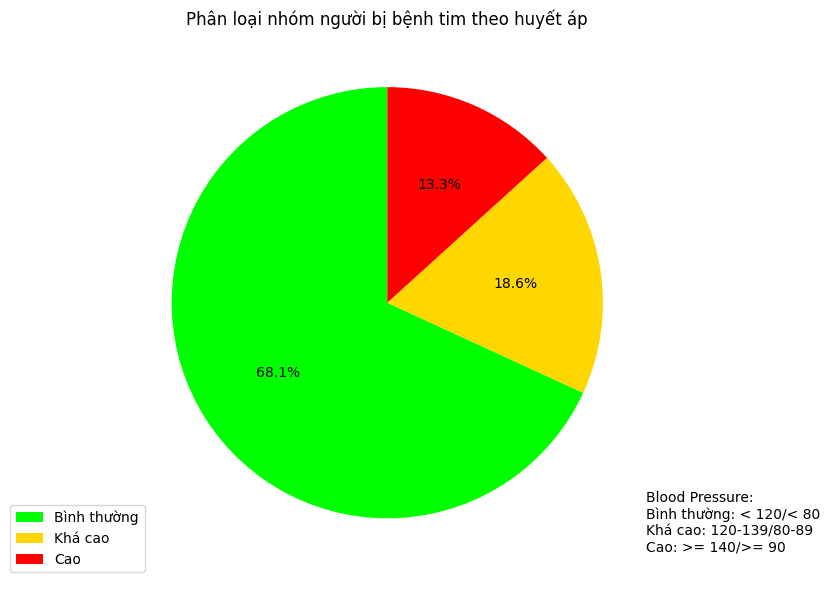

In [161]:
# Đếm tổng số người trong từng nhóm Blood Pressure
bp_counts = data['BP_Category'].value_counts()

# Vẽ biểu đồ tròn
colors = ['lime', 'gold', 'red']  # Màu sắc cho các nhóm
plt.figure(figsize=(7, 7))
plt.pie(bp_counts, autopct='%1.1f%%', startangle=90, colors=colors)

# Thêm chú thích về nhóm Blood Pressure
plt.text(1.2, -1.3,
         s='Blood Pressure:\n'
           'Bình thường: < 120/< 80\n'
           'Khá cao: 120-139/80-89\n'
           'Cao: >= 140/>= 90\n\n',
         fontsize=10)

# Thêm chú thích và tiêu đề
plt.legend(['Bình thường', 'Khá cao', 'Cao'], loc=(-0.2, 0))
plt.title('Phân loại nhóm người bị bệnh tim theo huyết áp')
plt.show()


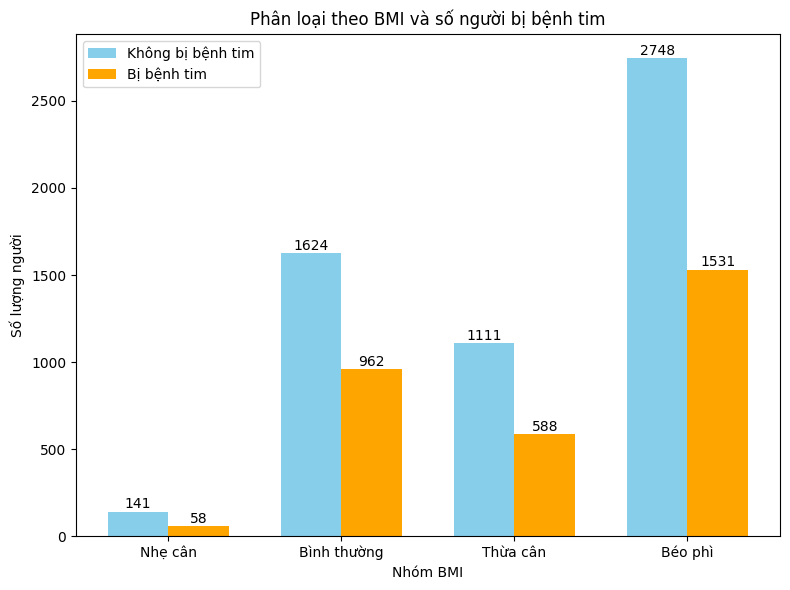

In [152]:
# Phân loại BMI thành các nhóm
bins = [0, 18.49, 24.9, 28.99, float('inf')]  # Các mức giới hạn cho các nhóm
labels = ['Nhẹ cân', 'Bình thường', 'Thừa cân', 'Béo phì']  # Các nhãn tương ứng với các nhóm

# Sử dụng pd.cut để phân chia cột BMI thành các nhóm
BMI_category = pd.cut(data['BMI'], bins=bins, labels=labels, ordered=False)
data['BMI_Category'] = BMI_category  # Thêm cột phân loại vào dữ liệu

# Tính tổng số người và số người bị bệnh tim trong từng nhóm BMI
total_counts = data.groupby(BMI_category)['Heart Attack Risk'].count()  # Tổng số người
heart_attack_counts = data.groupby(BMI_category)['Heart Attack Risk'].sum()  # Số người bị bệnh tim

# Tính số người không bị bệnh tim trong từng nhóm BMI
no_heart_attack = total_counts - heart_attack_counts  # Số người không bị bệnh tim

# Chuyển đổi dữ liệu thành danh sách cho các nhóm
categories = ['Nhẹ cân', 'Bình thường', 'Thừa cân', 'Béo phì']
no_heart_attack = no_heart_attack.reindex(categories).tolist()
heart_attack = heart_attack_counts.reindex(categories).tolist()

# Vẽ biểu đồ cột nhóm
x = np.arange(len(categories))  # Vị trí các nhóm
width = 0.35  # Độ rộng của mỗi cột

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, no_heart_attack, width, label='Không bị bệnh tim', color='skyblue')
bar2 = ax.bar(x + width/2, heart_attack, width, label='Bị bệnh tim', color='orange')

# Thêm nhãn trên các cột
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom')

# Tùy chỉnh biểu đồ
ax.set_xlabel('Nhóm BMI')
ax.set_ylabel('Số lượng người')
ax.set_title('Phân loại theo BMI và số người bị bệnh tim')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()


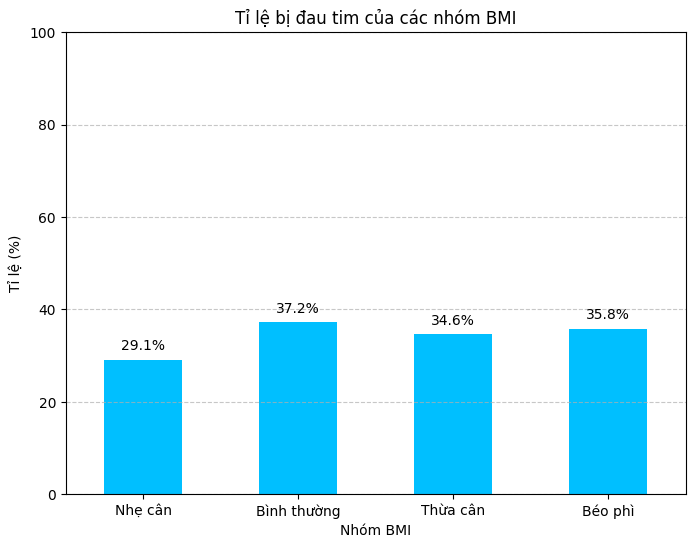

In [153]:
# Tính tỉ lệ % người bị bệnh tim trong từng nhóm BMI
heart_attack_percentage = (heart_attack_counts / total_counts) * 100  # Tỉ lệ %

# Vẽ biểu đồ tỉ lệ phần trăm
fig, ax = plt.subplots(figsize=(8, 6))
chart = heart_attack_percentage.plot(kind='bar', color='deepskyblue', ax=ax)

# Tùy chỉnh biểu đồ
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm nhãn giá trị trên từng cột
for p in chart.patches:
    chart.annotate(f"{p.get_height():.1f}%",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points',
                   fontsize=10)

plt.title('Tỉ lệ bị đau tim của các nhóm BMI')
plt.xlabel('Nhóm BMI')
plt.ylabel('Tỉ lệ (%)')
plt.show()


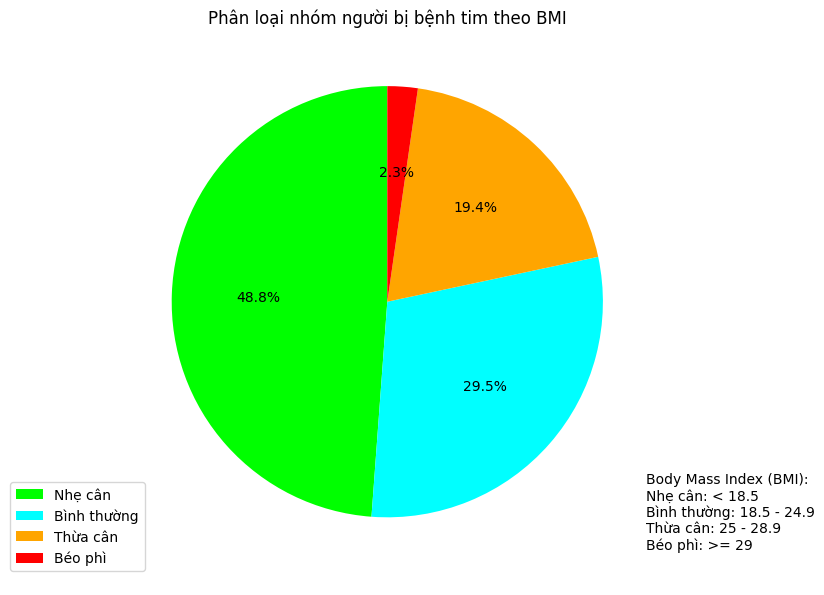

In [157]:
# Tính tổng số người trong từng nhóm BMI
bmi_counts = data['BMI_Category'].value_counts()  # Đếm tổng số người trong từng nhóm

# Màu sắc cho từng nhóm BMI
colors = ['lime', 'aqua', 'orange', 'red']

# Vẽ biểu đồ tròn
plt.figure(figsize=(7, 7))
plt.pie(bmi_counts, autopct='%1.1f%%', startangle=90, colors=colors)

# Thêm chú thích chi tiết về nhóm BMI
plt.text(1.2, -1.3,
         s='Body Mass Index (BMI):\n'
           'Nhẹ cân: < 18.5\n'
           'Bình thường: 18.5 - 24.9\n'
           'Thừa cân: 25 - 28.9\n'
           'Béo phì: >= 29\n\n',
         fontsize=10)

# Thêm chú thích và tiêu đề
plt.legend(['Nhẹ cân', 'Bình thường', 'Thừa cân', 'Béo phì'], loc=(-0.2, 0))
plt.title('Phân loại nhóm người bị bệnh tim theo BMI')
plt.show()


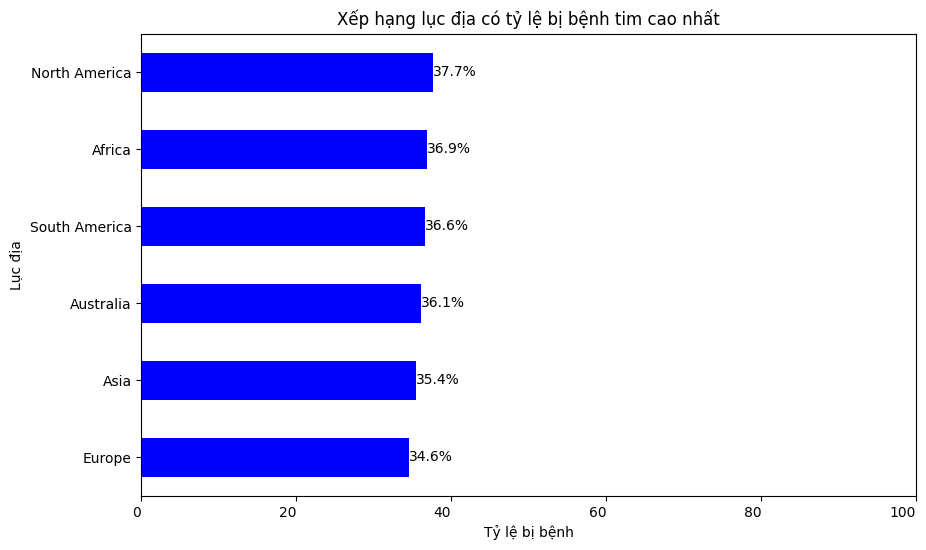

In [113]:
# Tính toán tỷ lệ bị bệnh tim cho mỗi châu lục
continent_risk = data.groupby('Continent')['Heart Attack Risk'].mean() * 100

# Sắp xếp tỷ lệ bệnh tim theo thứ tự giảm dần và lấy 10 quốc gia có tỷ lệ bệnh tim cao nhất
continent_risk_sorted = continent_risk.sort_values()

# Vẽ biểu đồ nằm ngang (horizontal bar chart)
plt.figure(figsize=(10, 6))
chart = continent_risk_sorted.plot(kind='barh', color='blue')

# Thêm tiêu đề và nhãn trục
plt.title('Xếp hạng lục địa có tỷ lệ bị bệnh tim cao nhất')
plt.xlabel('Tỷ lệ bị bệnh')

# Thêm giá trị tỷ lệ bệnh tim vào cuối mỗi thanh
for index, value in enumerate(continent_risk_sorted):
    chart.text(value, index, f'{value:.1f}%', va='center', ha='left', color='black', fontsize=10)

# Cài đặt trục hoành và xoay nhãn
plt.xlim(0, 100)  # Giới hạn trục x từ 0 đến 100
plt.xticks(rotation=0, ha='right')  # Không xoay nhãn trục x
plt.ylabel('Lục địa')
# Hiển thị biểu đồ
plt.show()

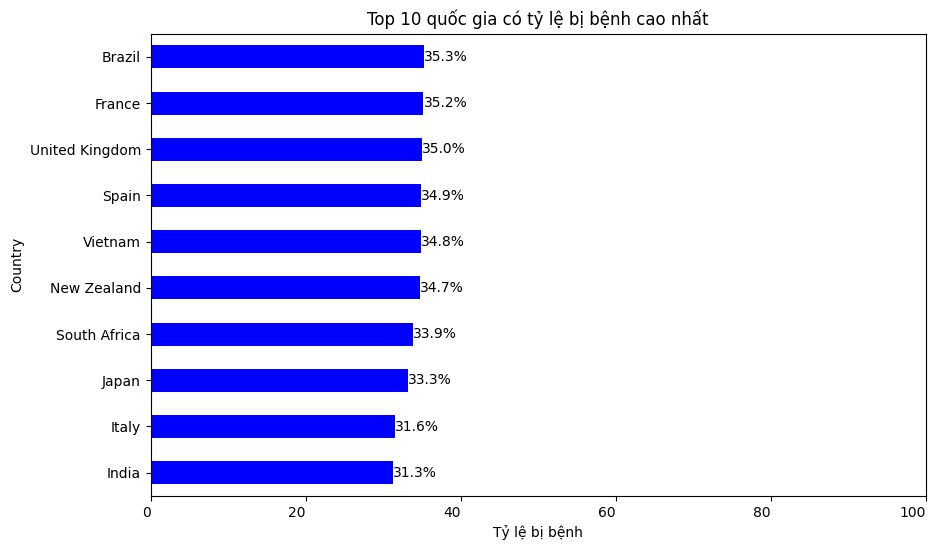

In [114]:
plt.figure(figsize=(10,6))
country_risk = data.groupby('Country')['Heart Attack Risk'].mean()*100
country_risk_sorted = country_risk.sort_values()
top_10_country = country_risk_sorted.head(10)

chart = top_10_country.plot(kind='barh', color='blue')

plt.title('Top 10 quốc gia có tỷ lệ bị bệnh cao nhất')
plt.xlabel('Tỷ lệ bị bệnh')
for index, value in enumerate(top_10_country):
    chart.text(value, index, f'{value:.1f}%', va='center', ha='left', color='black', fontsize=10)
plt.xlim(0,100)
plt.xticks(rotation=0, ha='right') 
plt.show()

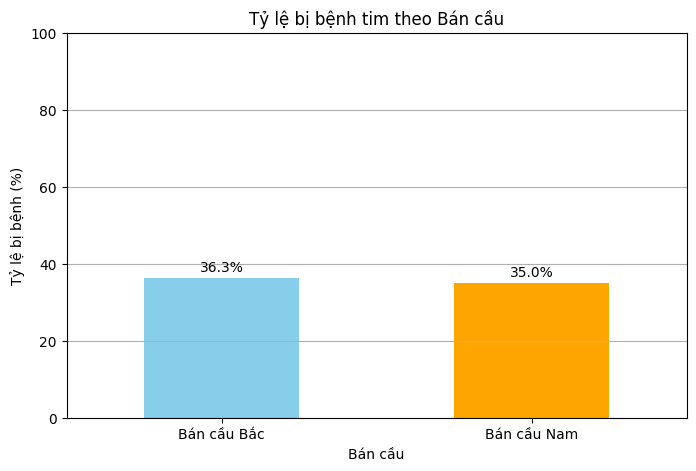

In [115]:
import matplotlib.pyplot as plt

# Giả sử bạn đã có cột 'Hemisphere' với giá trị 'Northern Hemisphere' và 'Southern Hemisphere'
# Nếu chưa có cột này, bạn có thể tự phân chia dựa trên vị trí quốc gia (VD: 'latitude')

# Tính toán tỷ lệ bệnh tim cho mỗi bán cầu
hemisphere_risk = data.groupby('Hemisphere')['Heart Attack Risk'].mean() * 100

# Sắp xếp tỷ lệ bệnh tim của các Bán cầu
hemisphere_risk_sorted = hemisphere_risk.sort_values(ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
chart = hemisphere_risk_sorted.plot(kind='bar', color=['skyblue', 'orange'])

# Thêm tiêu đề và nhãn trục
plt.title('Tỷ lệ bị bệnh tim theo Bán cầu')
plt.xlabel('Bán cầu')
plt.ylabel('Tỷ lệ bị bệnh (%)')

# Thêm tỷ lệ vào trên mỗi cột
for index, value in enumerate(hemisphere_risk_sorted):
    chart.text(index, value + 1, f'{value:.1f}%', va='bottom', ha='center', fontsize=10, color='black')

# Hiển thị biểu đồ
plt.ylim(0, 100)
plt.grid(axis='y')
plt.xticks(ticks=[0, 1], labels=['Bán cầu Bắc', 'Bán cầu Nam'], rotation=0)
plt.show()


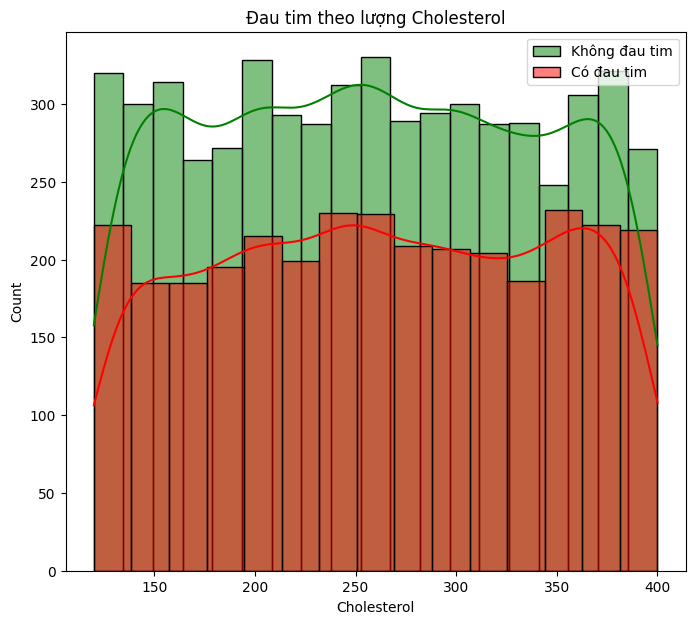

In [162]:
# Plot with histplot for both groups
plt.figure(figsize=(8,7))
sns.histplot(data[data['Heart Attack Risk'] == 0]["Cholesterol"], color='green', kde=True, label='Không đau tim')
sns.histplot(data[data['Heart Attack Risk'] == 1]["Cholesterol"], color='red', kde=True, label='Có đau tim')
plt.title('Đau tim theo lượng Cholesterol')
plt.legend()
plt.show()

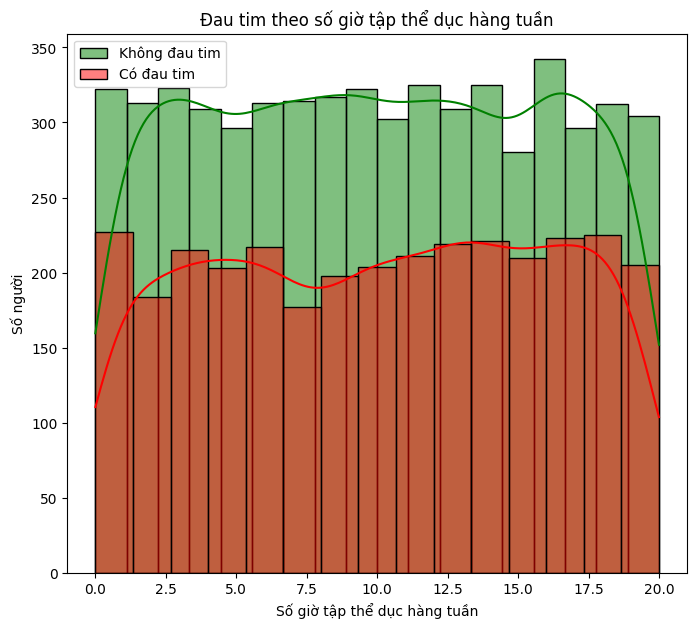

In [167]:
# Plot with histplot for both groups
plt.figure(figsize=(8,7))
sns.histplot(data[data['Heart Attack Risk'] == 0]["Exercise Hours Per Week"], color='green', kde=True, label='Không đau tim')
sns.histplot(data[data['Heart Attack Risk'] == 1]["Exercise Hours Per Week"], color='red', kde=True, label='Có đau tim')
plt.title('Đau tim theo số giờ tập thể dục hàng tuần')
plt.xlabel('Số giờ tập thể dục hàng tuần')
plt.ylabel('Số người')
plt.legend()
plt.show()

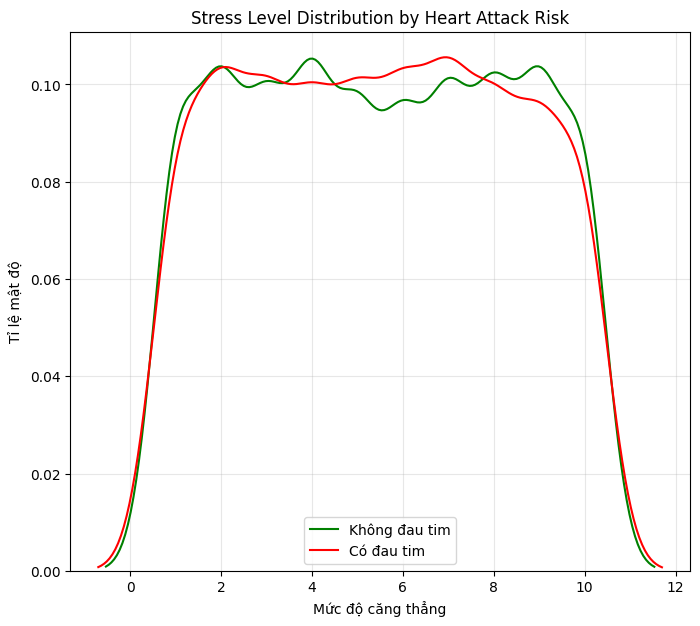

In [168]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán mật độ cho từng nhóm 'No Heart Attack' và 'Heart Attack'
no_attack_data = data[data['Heart Attack Risk'] == 0]["Stress Level"]
attack_data = data[data['Heart Attack Risk'] == 1]["Stress Level"]

# Tạo đồ thị với line chart cho từng nhóm
plt.figure(figsize=(8, 7))

# Vẽ mật độ cho nhóm 'No Heart Attack'
sns.kdeplot(no_attack_data, color='green', label='Không đau tim', fill=False)

# Vẽ mật độ cho nhóm 'Heart Attack'
sns.kdeplot(attack_data, color='red', label='Có đau tim', fill=False)

# Tuỳ chỉnh biểu đồ
plt.title('Stress Level Distribution by Heart Attack Risk')
plt.xlabel('Mức độ căng thẳng')
plt.ylabel('Tỉ lệ mật độ')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


<Figure size 800x700 with 0 Axes>

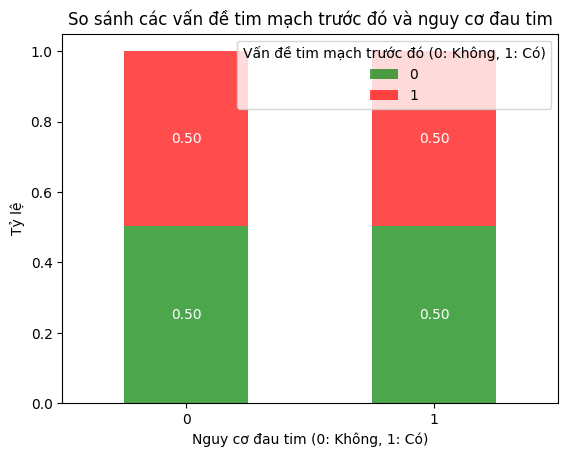

Những người có tiền sử bệnh tim có nguy cơ phát triển bệnh tim cao như những người không có tiền sử bệnh tim.


In [169]:
# Tính tổng số người trong mỗi nhóm Heart Attack Risk
total_counts = data.groupby('Heart Attack Risk')['Previous Heart Problems'].value_counts(normalize=True).unstack()

# Vẽ biểu đồ barplot
plt.figure(figsize=(8, 7))
ax = total_counts.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7)

# Hiển thị số lượng trên đầu mỗi bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()  # Lấy chiều cao bar
        if height > 0:  # Kiểm tra để tránh in giá trị 0
            ax.text(bar.get_x() + bar.get_width() / 2., bar.get_y() + height / 2., 
                    f'{height:.2f}', ha='center', va='center', fontsize=10, color='white')

# Cài đặt nhãn và tiêu đề
plt.title('So sánh các vấn đề tim mạch trước đó và nguy cơ đau tim')
plt.ylabel('Tỷ lệ')
plt.xlabel('Nguy cơ đau tim (0: Không, 1: Có)')
plt.xticks(rotation=0)
plt.legend(title="Vấn đề tim mạch trước đó (0: Không, 1: Có)")
plt.show()
print("Những người có tiền sử bệnh tim có nguy cơ phát triển bệnh tim cao như những người không có tiền sử bệnh tim.")


<Figure size 800x700 with 0 Axes>

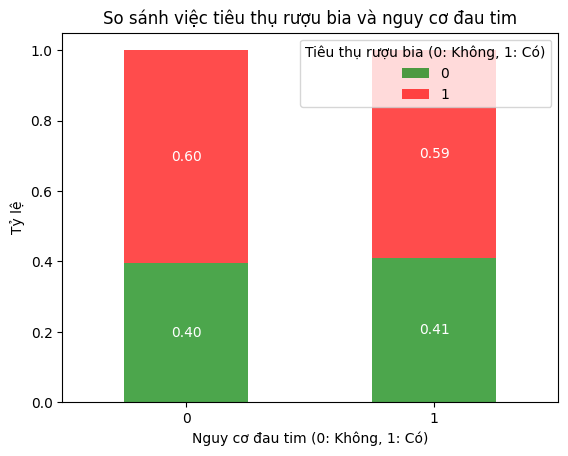

Tiêu thụ rượu bia không phải là nguyên nhân chính gây đau tim


In [171]:
# Tính tổng số người trong mỗi nhóm Nguy cơ đau tim
total_counts = data.groupby('Heart Attack Risk')['Alcohol Consumption'].value_counts(normalize=True).unstack()

# Vẽ biểu đồ barplot
plt.figure(figsize=(8, 7))
ax = total_counts.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7)

# Hiển thị số lượng trên đầu mỗi bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()  # Lấy chiều cao bar
        if height > 0:  # Kiểm tra để tránh in giá trị 0
            ax.text(bar.get_x() + bar.get_width() / 2., bar.get_y() + height / 2., 
                    f'{height:.2f}', ha='center', va='center', fontsize=10, color='white')

# Cài đặt nhãn và tiêu đề
plt.title('So sánh việc tiêu thụ rượu bia và nguy cơ đau tim')
plt.ylabel('Tỷ lệ')
plt.xlabel('Nguy cơ đau tim (0: Không, 1: Có)')
plt.xticks(rotation=0)
plt.legend(title="Tiêu thụ rượu bia (0: Không, 1: Có)")
plt.show()
print("Tiêu thụ rượu bia không phải là nguyên nhân chính gây đau tim")


<Figure size 800x700 with 0 Axes>

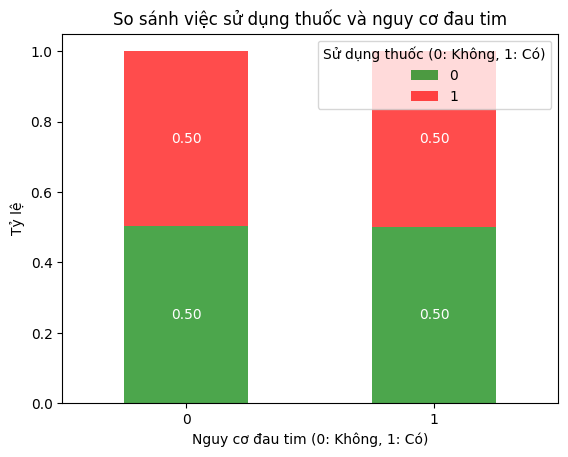

Sử dụng thuốc không phải là nguyên nhân chính gây đau tim


In [172]:
# Tính tổng số người trong mỗi nhóm Nguy cơ đau tim
total_counts = data.groupby('Heart Attack Risk')['Medication Use'].value_counts(normalize=True).unstack()

# Vẽ biểu đồ barplot
plt.figure(figsize=(8, 7))
ax = total_counts.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7)

# Hiển thị số lượng trên đầu mỗi bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()  # Lấy chiều cao bar
        if height > 0:  # Kiểm tra để tránh in giá trị 0
            ax.text(bar.get_x() + bar.get_width() / 2., bar.get_y() + height / 2., 
                    f'{height:.2f}', ha='center', va='center', fontsize=10, color='white')

# Cài đặt nhãn và tiêu đề
plt.title('So sánh việc sử dụng thuốc và nguy cơ đau tim')
plt.ylabel('Tỷ lệ')
plt.xlabel('Nguy cơ đau tim (0: Không, 1: Có)')
plt.xticks(rotation=0)
plt.legend(title="Sử dụng thuốc (0: Không, 1: Có)")
plt.show()
print("Sử dụng thuốc không phải là nguyên nhân chính gây đau tim")


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# III/ Mô hình dự đoán

**Xử lí các dữ liệu thành dạng số**

Encode các cột:
- Sex.
- Country.
- Continent.
- Hemisphere.

In [123]:
data.drop(['Chol_Category','HR_Category','BP_Category','BMI_Category'],axis=1, inplace=True)

In [124]:
encoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = encoder.fit_transform(data[[col]])

In [125]:
X = data.drop(['Patient ID', 'Heart Attack Risk'],
              axis=1, 
              inplace=False)
y = data['Heart Attack Risk'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

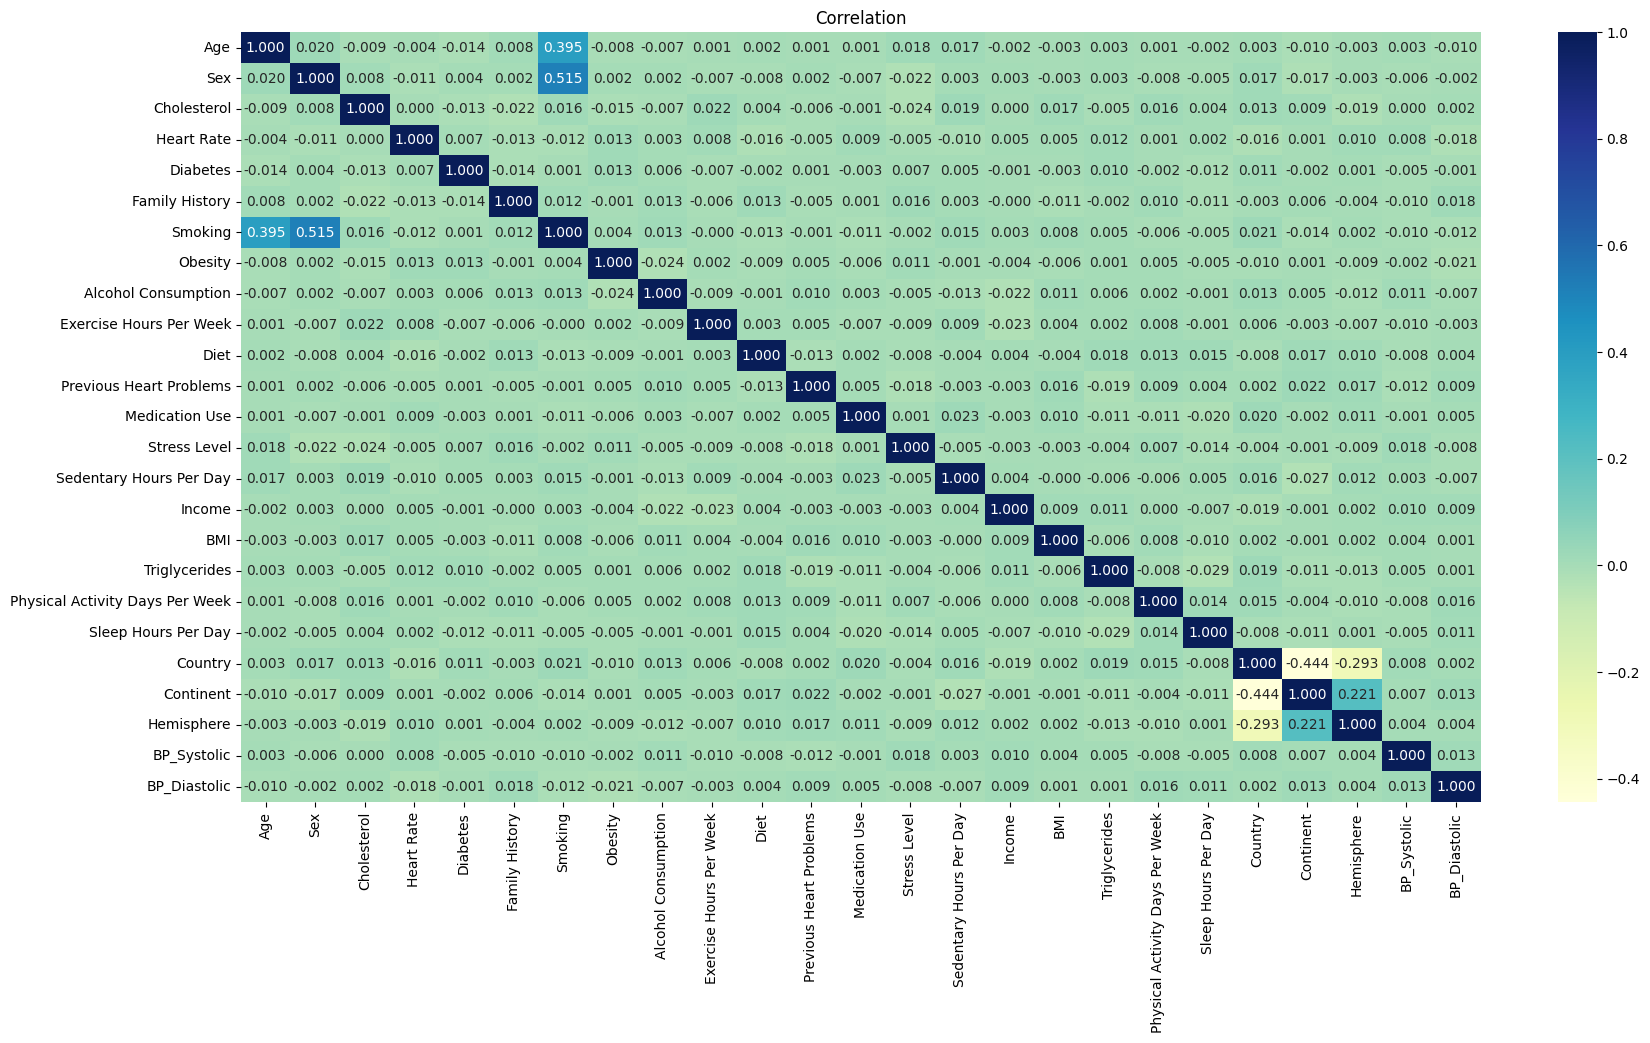

In [126]:
plt.figure(figsize = (20,10))
sns.heatmap(X.corr(), cmap="YlGnBu", annot=True, fmt='.3f')
plt.title("Correlation")
plt.show()

In [127]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [128]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

- train_size: tỉ lệ bộ để train 
- random_state: mỗi lần chia sẽ dùng cách chia được đánh dấu là random_state 0

In [129]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(7010, 25) (7010,)
(1753, 25) (1753,)


- Dữ liệu sẽ có các thuộc tính với các đơn vị đo khác nhau, khi dùng các thuật toán như KNN có thể gây nhầm lẫn. 
    - VD: dữ liệu về chiều cao và cân nặng của 1 đứa trẻ là 150cm và 40kg, đó là số liệu bình thường của 1 đứa trẻ, nhưng nếu không chuẩn hóa 2 thuộc tính này, thuật toán KNN có thể bị nhầm lẫn cho rằng chiều cao quan trọng hơn cân nặng dẫn đến dự đoán sai.
- Feature scalling là 1 bước để chuẩn hóa các thuộc tính:
    + StandardScaler: biến đổi dữ liệu sao cho mean = 0 và std = 1. Giữ được phân phối ban đầu của dữ liệu, kể cả outliers -> phù hợp khi dữ liệu có outliers
    + MinMaxScaler: biến đổi dữ liệu về khoảng giá trị nhất định, khiến outliers bị 'co cụm' lại.
- Trong bài tập lớn này ta sẽ dùng MinMaxScaler


In [130]:
print('x_train:')
print(x_train)
print()
print('x_test:')
print(x_test)

x_train:
      Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
7361   54    1          265          77         0               1        1   
54     31    1          243          92         1               1        1   
4133   27    1          153         106         0               1        1   
7011   74    1          319          82         0               1        1   
4230   76    1          149          42         1               0        1   
...   ...  ...          ...         ...       ...             ...      ...   
2895   29    0          399          94         0               0        0   
7813   70    1          280          88         0               0        1   
905    79    1          139          77         1               0        1   
5192   50    1          347          68         1               1        1   
235    75    0          389          51         0               1        1   

      Obesity  Alcohol Consumption  Exercise Hours Per

In [131]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print('New x_train:')
print(x_train)
print()
print('New x_test:')
print(x_test)

New x_train:
[[0.5        1.         0.51785714 ... 1.         0.83333333 0.14      ]
 [0.18055556 1.         0.43928571 ... 0.         0.11111111 0.4       ]
 [0.125      1.         0.11785714 ... 0.         0.53333333 0.3       ]
 ...
 [0.84722222 1.         0.06785714 ... 0.         0.06666667 0.32      ]
 [0.44444444 1.         0.81071429 ... 1.         0.84444444 0.22      ]
 [0.79166667 0.         0.96071429 ... 1.         0.36666667 0.94      ]]

New x_test:
[[0.54166667 1.         0.35       ... 0.         0.26666667 0.14      ]
 [0.01388889 0.         0.57142857 ... 1.         0.54444444 0.88      ]
 [0.98611111 0.         0.64285714 ... 0.         0.37777778 0.66      ]
 ...
 [0.94444444 1.         0.225      ... 1.         0.9        0.4       ]
 [0.13888889 0.         0.4        ... 1.         0.07777778 0.9       ]
 [0.02777778 1.         0.90357143 ... 0.         0.27777778 0.62      ]]


- fit_transform(): tính mean và std của tập x_train (fit) và chuẩn hóa nó (transform)
- Dùng transform() cho x_test chứ không dùng fit_transform() vì x_test sẽ được chuẩn hóa theo x_train

**1. Confusion matrix:**
[[True Negative, False Positive]
[False Negative, True Positive]]

**2. Accuracy Score:** Độ chính xác tổng thể của mô hình: (TP + TN) / (TP + TN + FP + FN)

**3. Precision:** Tỷ lệ dự đoán đúng là có bệnh trên tổng số dự đoán là có bệnh: TP / (TP + FP)

**4. Recall:** Tỷ lệ dự đoán đúng là có bệnh trên tổng số trường hợp thực sự có bệnh: TP / (TP + FN)

**5. F1-score:**  Sự cân bằng giữa *precision* và *recall*: 2 * (Precision * Recall) / (Precision + Recall)

=> Khi dự đoán khả năng bị bệnh, kết quả Fasle Positive dường như sẽ 'có lợi' hơn False Negative, vì vậy khi lựa chọn mô hình, ta sẽ ưu tiên mô hình có FN thấp hơn, tức recall cao hơn.

**1. Gausse**

In [132]:
nb = GaussianNB(priors=[0.6, 0.4], var_smoothing=1e-8)
nb.fit(x_train, y_train)
nb_predicted = nb.predict(x_test)
nb_conf = confusion_matrix(y_test, nb_predicted)
nb_accuracy = accuracy_score(y_test, nb_predicted)*100
nb_pre = precision_score(y_test,nb_predicted,zero_division=1)*100
nb_recall = recall_score(y_test, nb_predicted, zero_division=1)*100
nb_f1 = f1_score(y_test, nb_predicted, zero_division=1)*100
print('Confusion matrix:')
print(nb_conf)
print("The accuracy of Gaussian Naive Bayes model is : ", nb_accuracy, "%")
print("The precision of Gaussian Naive Bayes model is : ", nb_pre, "%")
print("The recall of Gaussian Naive Bayes model is : ", nb_recall, "%")
print("The f1 score of Gaussian Naive Bayes model is : ", nb_f1, "%")

Confusion matrix:
[[1132   10]
 [ 606    5]]
The accuracy of Gaussian Naive Bayes model is :  64.86023958927552 %
The precision of Gaussian Naive Bayes model is :  33.33333333333333 %
The recall of Gaussian Naive Bayes model is :  0.8183306055646482 %
The f1 score of Gaussian Naive Bayes model is :  1.5974440894568689 %


**2. Support Vector Machine**

In [133]:
svm = SVC(C=10,gamma='scale',kernel='rbf')
svm.fit(x_train, y_train)
svm_predicted = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_predicted)
svm_accuracy = accuracy_score(y_test, svm_predicted)*100
svm_pre = precision_score(y_test,svm_predicted,zero_division=1)*100
svm_recall = recall_score(y_test, svm_predicted, zero_division=1)*100
svm_f1 = f1_score(y_test, svm_predicted, zero_division=1)*100
print('Confusion matrix:')
print(svm_conf)
print("The accuracy of Support Vector Machine model is : ", svm_accuracy, "%")
print("The precision of Support Vector Machine model is : ", svm_pre, "%")
print("The recall of Support Vector Machine model is : ", svm_recall, "%")
print("The f1 score of Support Vector Machine model is : ", svm_f1, "%")

Confusion matrix:
[[823 319]
 [436 175]]
The accuracy of Support Vector Machine model is :  56.93097547062179 %
The precision of Support Vector Machine model is :  35.4251012145749 %
The recall of Support Vector Machine model is :  28.641571194762683 %
The f1 score of Support Vector Machine model is :  31.674208144796378 %


In [134]:
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }
# cv = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='f1', cv=5)
# cv.fit(x_train, y_train)
# print(cv.best_params_)
# print(cv.best_score_)

**3. Random Forest**

In [135]:
rf = RandomForestClassifier(n_estimators=50, 
                            random_state=43, 
                            max_features=0.5)
rf.fit(x_train, y_train)
rf_predicted = rf.predict(x_test)
rf_conf = confusion_matrix(y_test, rf_predicted)
rf_accuracy = accuracy_score(y_test, rf_predicted)*100
rf_pre = precision_score(y_test,rf_predicted,zero_division=1)*100
rf_recall = recall_score(y_test, rf_predicted, zero_division=1)*100
rf_f1 = f1_score(y_test, rf_predicted, zero_division=1)*100
print('Confusion matrix:')
print(rf_conf)
print("The accuracy of Random Forest model is : ", rf_accuracy, "%")
print("The precision of Random Forest model is : ", rf_pre, "%")
print("The recall of Random Forest model is : ", rf_recall, "%")
print("The f1 score of Random Forest model is : ", rf_f1, "%")

Confusion matrix:
[[1065   77]
 [ 565   46]]
The accuracy of Random Forest model is :  63.37706788362807 %
The precision of Random Forest model is :  37.39837398373984 %
The recall of Random Forest model is :  7.528641571194762 %
The f1 score of Random Forest model is :  12.534059945504087 %


In [136]:
# param_grid = {
#     'n_estimators': [50, 100, 300, 500],
#     'max_features': [0.5, 'sqrt', 'log2']
# }
# cv = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1', cv=5)
# cv.fit(x_train, y_train)
# print(cv.best_params_)
# print(cv.best_score_)

**4. XGBoost**

In [137]:
xgb_model = xgb.XGBClassifier(learning_rate= 0.1,
                            n_estimators= 500,
                            max_depth= 5,
                            subsample= 0.8,
                            colsample_bytree= 1,
                            objective='binary:logistic')
xgb_model.fit(x_train, y_train)
xgb_predicted = xgb_model.predict(x_test)
xgb_conf = confusion_matrix(y_test, xgb_predicted)
xgb_accuracy = accuracy_score(y_test, xgb_predicted)*100
xgb_pre = precision_score(y_test,xgb_predicted,zero_division=1)*100
xgb_recall = recall_score(y_test, xgb_predicted, zero_division=1)*100
xgb_f1 = f1_score(y_test, xgb_predicted, zero_division=1)*100
print('Confusion matrix:')
print(xgb_conf)
print("The accuracy of XGBoost model is : ", xgb_accuracy, "%")
print("The precision of XGBoost model is : ", xgb_pre, "%")
print("The recall of XGBoost model is : ", xgb_recall, "%")
print("The f1 score of XGBoost model is : ", xgb_f1, "%")

Confusion matrix:
[[932 210]
 [487 124]]
The accuracy of XGBoost model is :  60.23958927552767 %
The precision of XGBoost model is :  37.12574850299401 %
The recall of XGBoost model is :  20.29459901800327 %
The f1 score of XGBoost model is :  26.24338624338624 %


In [138]:
# param_grid = {
#     'learning_rate': [0.01, 0.1],
#     'n_estimators': [100, 500],
#     'max_depth': [3, 5],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
# }
# cv = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=5)
# cv.fit(x_train, y_train)
# print(cv.best_params_)
# print(cv.best_score_)

**5. K Nearest Neighbor**

In [139]:
knn = KNeighborsClassifier(n_neighbors=1,p=1,weights='uniform')
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)
knn_conf = confusion_matrix(y_test, knn_predicted)
knn_accuracy = accuracy_score(y_test, knn_predicted)*100
knn_pre = precision_score(y_test,knn_predicted,zero_division=1)*100
knn_recall = recall_score(y_test, knn_predicted, zero_division=1)*100
knn_f1 = f1_score(y_test, knn_predicted, zero_division=1)*100
print('Confusion matrix:')
print(knn_conf)
print("The accuracy of K Nearest Neighbor model is : ", knn_accuracy, "%")
print("The precision of K Nearest Neighbor model is : ", knn_pre, "%")
print("The recall of K Nearest Neighbor model is : ", knn_recall, "%")
print("The f1 score of K Nearest Neighbor model is : ", knn_f1, "%")

Confusion matrix:
[[738 404]
 [391 220]]
The accuracy of K Nearest Neighbor model is :  54.64917284654878 %
The precision of K Nearest Neighbor model is :  35.256410256410255 %
The recall of K Nearest Neighbor model is :  36.00654664484452 %
The f1 score of K Nearest Neighbor model is :  35.62753036437247 %


In [140]:
# param_grid = {
#     'n_neighbors': np.arange(1,51),
#     'weights': ['uniform', 'distance'],
#     'p': [0., 1., 2.]
# }
# cv = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='f1', cv=5)
# cv.fit(x_train, y_train)
# print(cv.best_params_)
# print(cv.best_score_)

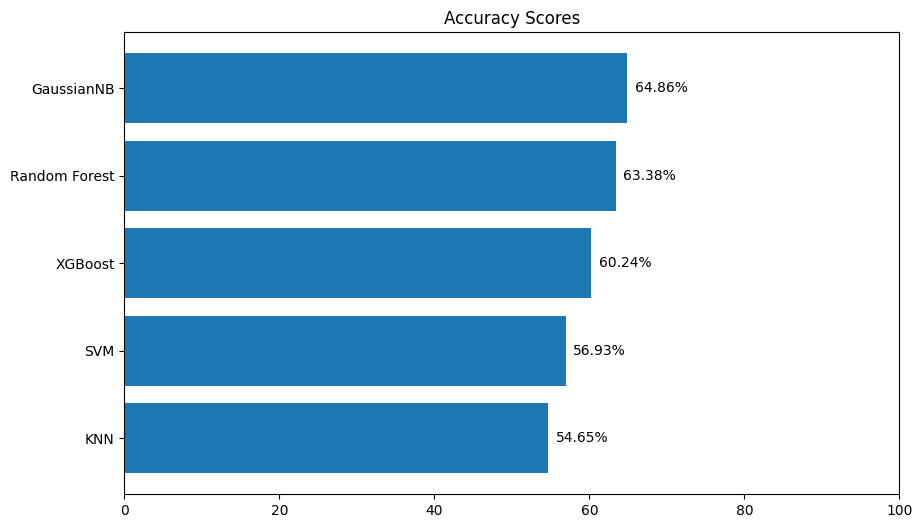

In [141]:
plt.figure(figsize=(10,6))
acc_dict = {'GaussianNB': nb_accuracy, 'SVM': svm_accuracy, 'Random Forest': rf_accuracy, 'XGBoost':xgb_accuracy, 'KNN':knn_accuracy}
sorted_acc_dict = dict(sorted(acc_dict.items(), key=lambda x: x[1]))
accuracy_chart = plt.barh(y=sorted_acc_dict.keys(), width=sorted_acc_dict.values())
for bar in accuracy_chart:
    plt.text(
    bar.get_width() + 1,                
    bar.get_y() + bar.get_height() / 2,
    f'{bar.get_width():.2f}%',       
    va='center', ha='left', color='black', fontsize=10
    )
plt.xlim(0, 100)
plt.title("Accuracy Scores")
plt.show()

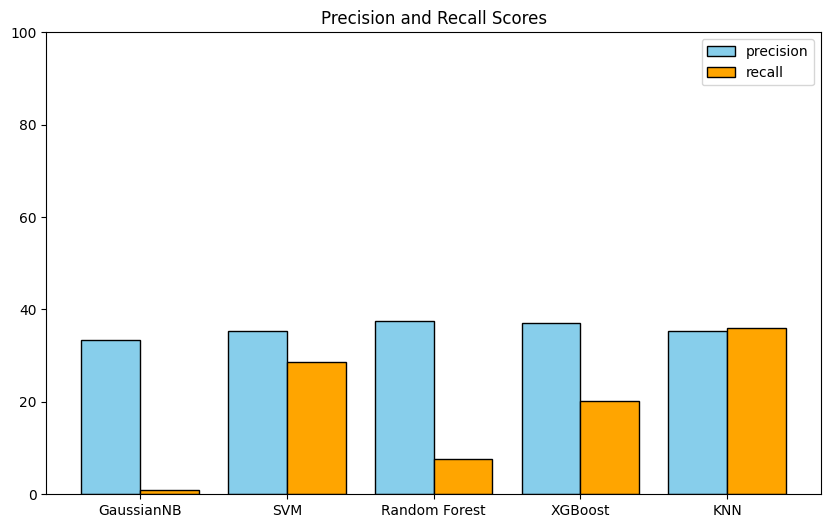

In [142]:
plt.figure(figsize=(10,6))
labels = ['GaussianNB', 'SVM', 'Random Forest', 'XGBoost', 'KNN']
precision_values = [nb_pre, svm_pre, rf_pre, xgb_pre, knn_pre]
recall_values = [nb_recall, svm_recall, rf_recall, xgb_recall, knn_recall]
x = np.arange(len(labels))
bar_width = 0.4
plt.bar(x - bar_width/2, precision_values, width=bar_width, color='skyblue', label='precision', edgecolor='black')
plt.bar(x + bar_width/2, recall_values, width=bar_width, color='orange', label='recall', edgecolor='black')
plt.xticks(x, labels) 
plt.legend()
plt.ylim(0,100)
plt.title('Precision and Recall Scores')
plt.show()

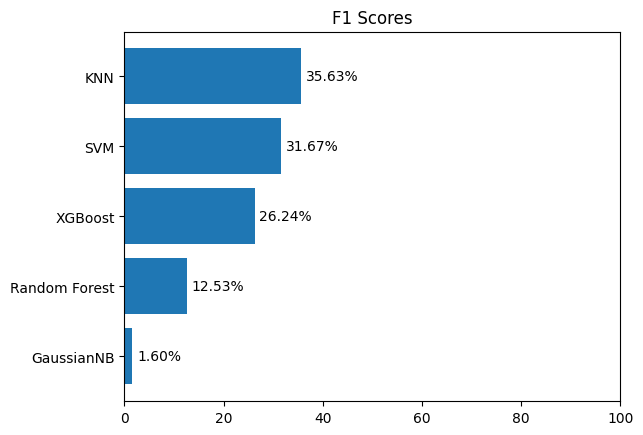

In [143]:
f1_dict = {'GaussianNB': nb_f1, 'SVM': svm_f1, 'Random Forest': rf_f1, 'XGBoost':xgb_f1, 'KNN':knn_f1}
sorted_f1_dict = dict(sorted(f1_dict.items(), key=lambda x: x[1]))
f1_chart = plt.barh(y=sorted_f1_dict.keys(), width=sorted_f1_dict.values())
plt.xlim(0, 100)
for bar in f1_chart:
    plt.text(
    bar.get_width() + 1,                
    bar.get_y() + bar.get_height() / 2,
    f'{bar.get_width():.2f}%',       
    va='center', ha='left', color='black', fontsize=10
    )
plt.title("F1 Scores")
plt.show()

**TÌM NGUYÊN NHÂN ACCURACY THẤP**

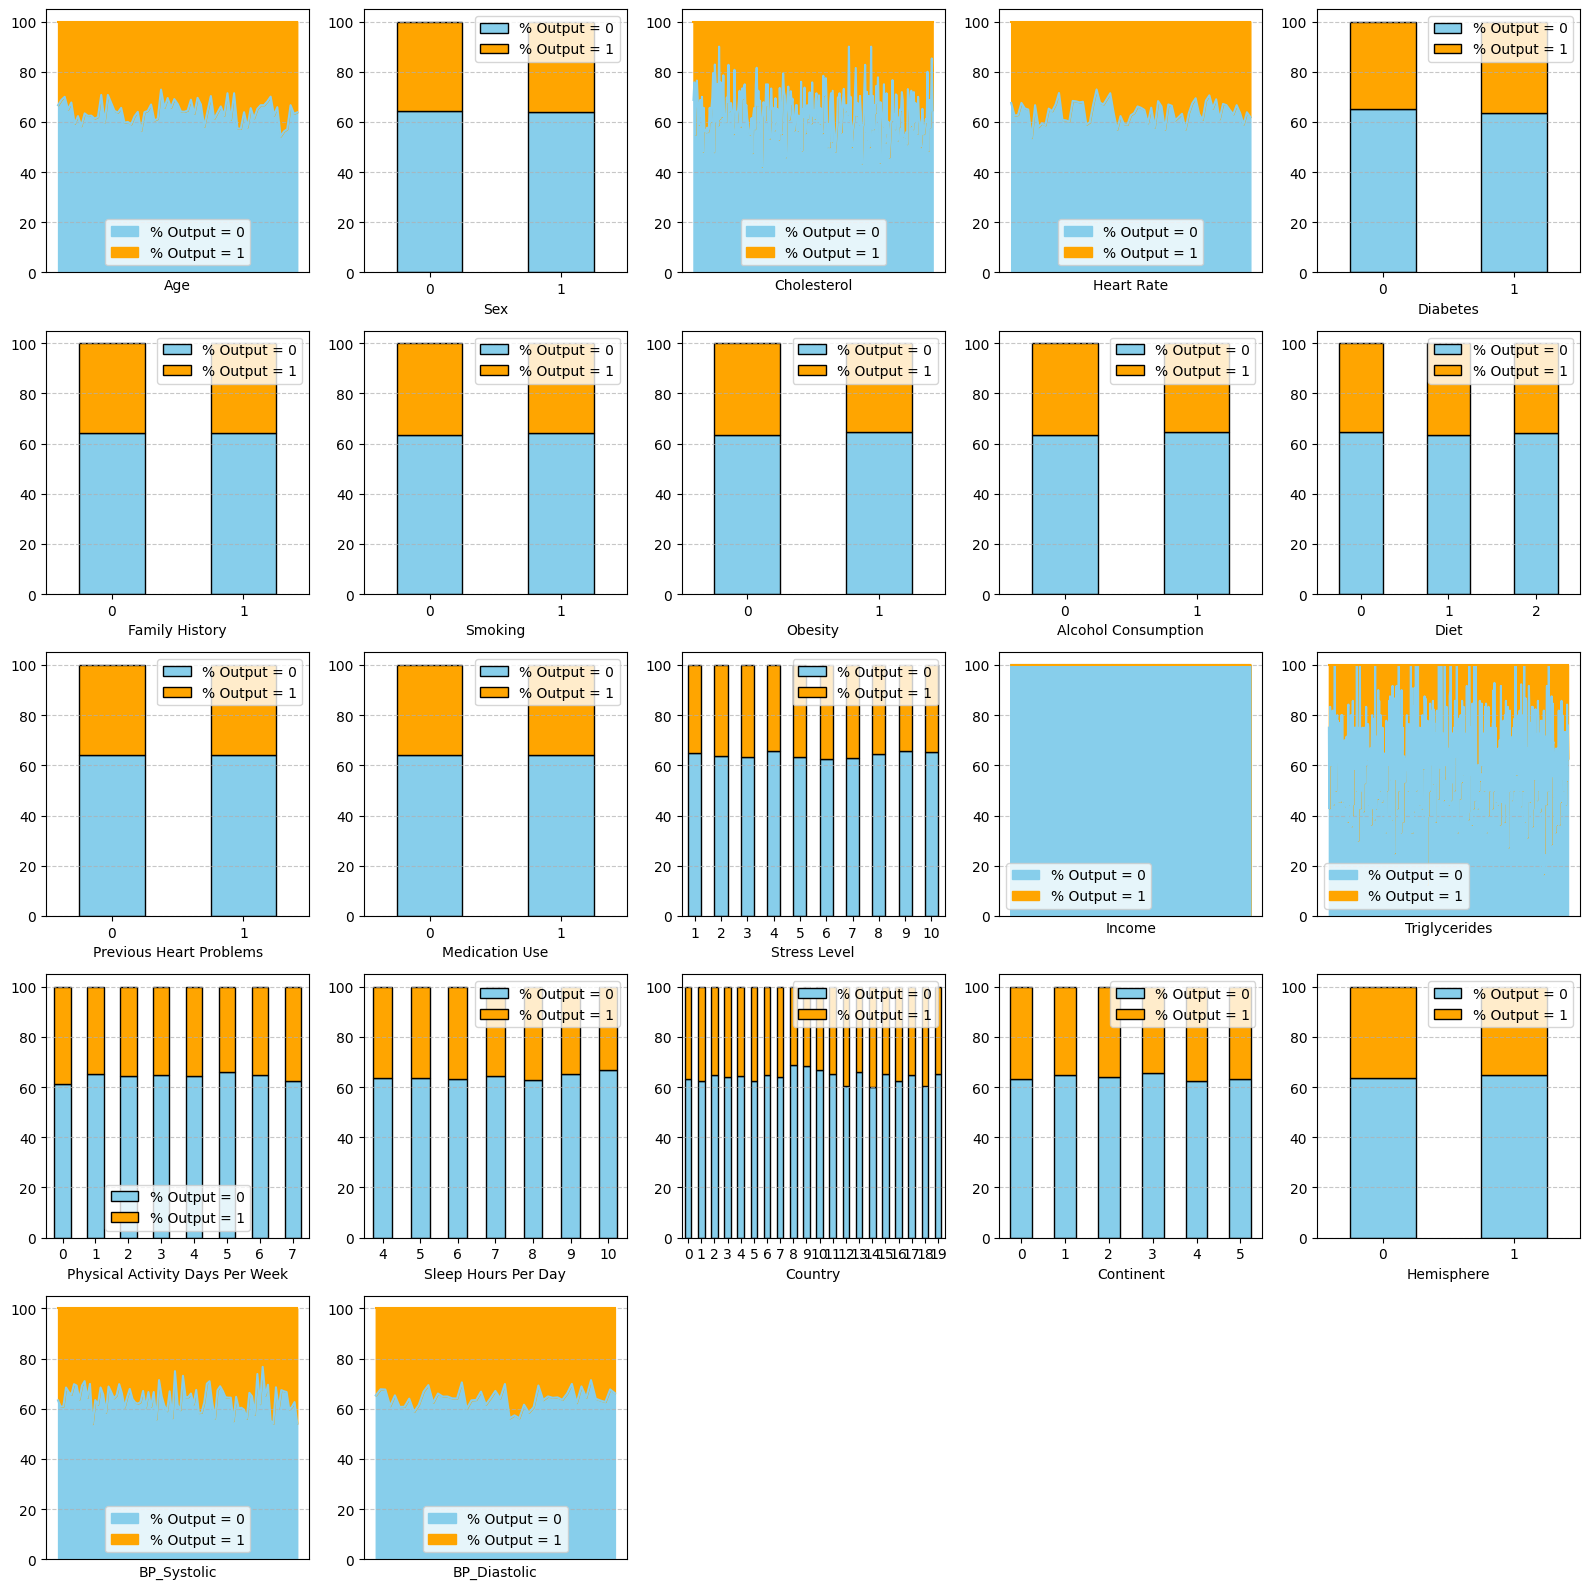

In [144]:
i = 1
plt.figure(figsize=(16, 16))
for col in X.columns:
    if X[col].dtype == 'int64':
        plt.subplot(5, 5, i)
        percentages = data.groupby(col)['Heart Attack Risk'].value_counts(normalize=True).unstack().fillna(0) * 100
        percentages.columns = ['% Output = 0', '% Output = 1']

        if X[col].nunique() > 50:
            percentages.plot(kind='area', stacked=True, color=['skyblue', 'orange'], ax=plt.gca())
            plt.xticks([])
        else:
            percentages.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], edgecolor='black', ax=plt.gca())
            
            plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        i += 1
plt.tight_layout()
plt.show()

-> Nhìn vào biểu đồ sự tương quan giữa từng thuộc tính với tỉ lệ output có thể thấy được nguyên nhân accuracy xấp xỉ 60% là do từng thuộc tính trong dataset đều có tỉ lệ output = 0 xấp xỉ 60%

Bỏ từng thuộc tính xem cột nào ảnh hưởng đến độ chính xác

In [145]:
# import xgboost as xgb
# models = {'Naive_Bayes':GaussianNB(),
#           'SVM':SVC(kernel = 'rbf'),
#           'Random_Forest':RandomForestClassifier(),
#           'KNN':KNeighborsClassifier(n_neighbors = 41),
#          'XGBoost':xgb.XGBClassifier(),
#           }

In [146]:
# max_accuracy = (0, 0)
# for j in range(x_train.shape[1]):
#     print('Delete column number', j, ':')
#     x_train_reduced = np.delete(x_train, j, axis=1)
#     x_test_reduced = np.delete(x_test, j, axis=1)
#     accuracy_scores = []
#     for i in models: 
#         obj = models[i]
#         obj.fit(x_train_reduced, y_train)
#         obj_pred = obj.predict(x_test_reduced)
#         accuracy = accuracy_score(y_test,obj_pred)
#         accuracy_scores.append(accuracy)
#         print('Accuracy of '+i+': ',accuracy)
#     if max_accuracy[1] < max(accuracy_scores):
#         max_accuracy = (j, max(accuracy_scores))
#     print()
# print(max_accuracy)

-> Có thể thấy khi bỏ 1 trong số các cột thì accuracy không thay đổi đáng kể

**VẼ BIỂU ĐỒ DỰ ĐOÁN:** KNN có accuracy thấp nhất nhưng không quá thấp so với những mô hình còn lại, tuy nhiên recall và f1-score của KNN lại cao vượt trội nên ta sẽ dùng KNN

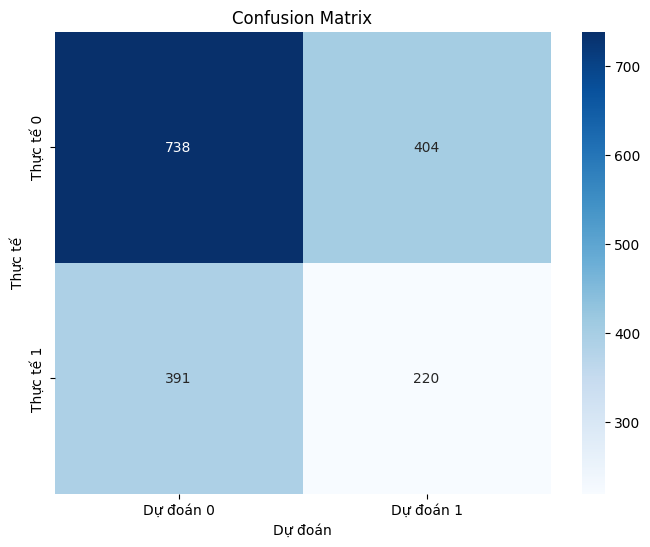

In [147]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(knn_conf, annot=True, fmt='d', cmap='Blues', xticklabels=['Dự đoán 0', 'Dự đoán 1'], yticklabels=['Thực tế 0', 'Thực tế 1']) 
plt.xlabel('Dự đoán') 
plt.ylabel('Thực tế') 
plt.title('Confusion Matrix')
plt.show()

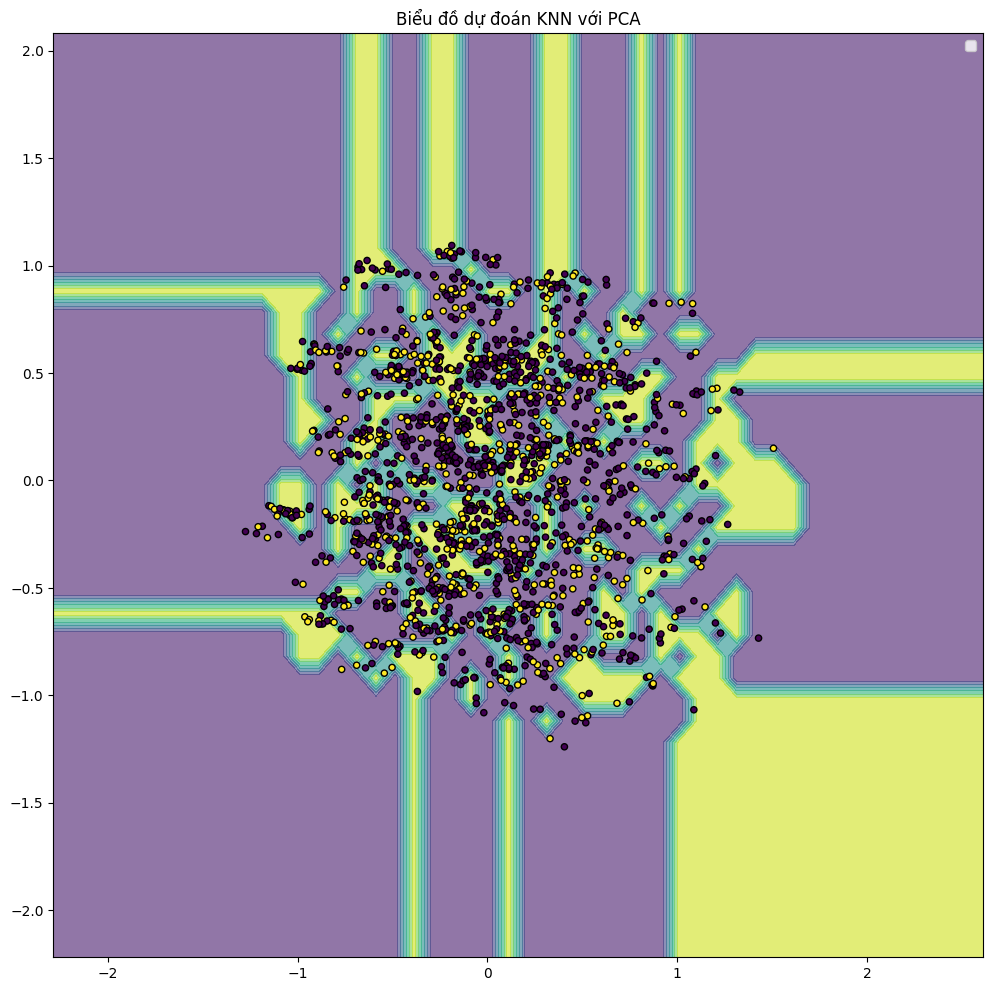

In [148]:
plt.figure(figsize=(12, 12))
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
rf_pca = KNeighborsClassifier(n_neighbors=1, p=1, weights='distance')
rf_pca.fit(x_train_pca, y_train)
y_pred = rf_pca.predict(x_test_pca)

x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = rf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.6)

plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test, s=20, edgecolor='k')

plt.title('Biểu đồ dự đoán KNN với PCA')
plt.legend()
plt.show()